# Manejo de un dataset con pandas y scikit-learn

## Objetivo

El objetivo de este notebook es presentarles algunas tareas básicas: 
    a) cargar un dataset;
    b) preprocesarlo y partirlo en entrenamiento/testeo;
    c) ejecutar un clasificador y evaluar su resultado.

## Carga

In [1]:
import pandas as pd
DATASET_FILE = './qsar_oral_toxicity.csv'

Leemos el dataset usando pandas, e imprimimos los primeros 10 registros para tener una idea de lo que hay. El archivo de este dataset es un .csv, donde el separador es ';' y no hay cabezal.

In [3]:
dataset = pd.read_csv(DATASET_FILE, sep=';', header=None)
dataset.columns = ['c' + str(col) for col in dataset.columns]
print("{} records read from {}\n{} attributes found".format(dataset.shape[0], DATASET_FILE, dataset.shape[1]))
dataset.head(10)

8992 records read from ./qsar_oral_toxicity.csv
1025 attributes found


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1015,c1016,c1017,c1018,c1019,c1020,c1021,c1022,c1023,c1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,negative
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
7,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,positive
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,negative
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


Los atributos son las columnas del c0 a la c1023. La salida esperada es la columna c1024. 
Veamos, por ejemplo, como está distribuída el atributo de salida.

In [8]:
dataset.c1024.value_counts()

c1024
negative    8251
positive     741
Name: count, dtype: int64

Las clases están muy desbalanceadas, lo que puede ser un problema para el clasificador.

## Preprocesamiento

In [9]:
from sklearn import preprocessing, model_selection

Para lo que vimos en el teórico alcanzaría, pero scikit-learn solo acepta atributos numéricos, cosa que no cumple la columna de salida c1024. Como solo hay dos valores (positive/negative) lo resolveríamos fácil de otra forma, sin embargo, vamos a probar con un "ordinal encoder". Básicamente, busca todos los valores posibles y les asigna un ordinal. En nuestro caso, nos interesa procesar solamente a la columna de salida.

In [10]:
# creamos un codificador "ordinal" y lo ajustamos a la columna 1024 
enc = preprocessing.OrdinalEncoder()
enc.fit(dataset[['c1024']])
for i, cat in enumerate(enc.categories_[0]): print("{} -> {}".format(cat, i))


#transformamos la columna 1024 y la guardamos en una nueva columna
dataset['output']  = enc.transform(dataset[['c1024']])

#veamos qué quedo ahora...
dataset.head(10)



negative -> 0
positive -> 1


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1016,c1017,c1018,c1019,c1020,c1021,c1022,c1023,c1024,output
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,negative,0.0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,negative,0.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,positive,1.0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,negative,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0


Separemos en un conjunto de test y entrenamiento, dándole 80% del dataset al entrenamiento y 20% al testeo.

In [11]:
train, test = model_selection.train_test_split(dataset, test_size=0.2, random_state=42)

print("{} samples for training, {} samples for testing".format(train.shape[0], test.shape[0]))
train.head(10)

7193 samples for training, 1799 samples for testing


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1016,c1017,c1018,c1019,c1020,c1021,c1022,c1023,c1024,output
3846,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,negative,0.0
2088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
4030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
5991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
308,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,negative,0.0
8821,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
7549,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,negative,0.0
4121,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
87,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,negative,0.0


Observar que si ejecuto de nuevo la celda precedente, el resultado es el mismo. Esto se debe a que está fijado el valor de "random_state". Quitando este parámetro, la partición será distinta en cada ejecución.


Aunque no lo vamos a usar en este notebook, como ejemplo aplicamos muestreo con repetición tomando 10 elementos del 0 al 20.

In [15]:
from sklearn import utils

print("10 numbers with repetition from [0,20]:")
print(utils.resample(range(20), n_samples=10, replace=True), "\n")

print("10 items with repetition from first 20 rows:\n")
utils.resample(dataset[0:20], n_samples=10, replace=True)

10 numbers with repetition from [0,20]:
[0, 12, 17, 19, 14, 14, 10, 11, 4, 16] 

10 items with repetition from first 20 rows:



,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c1016,c1017,c1018,c1019,c1020,c1021,c1022,c1023,c1024,output
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,positive,1.0
13,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,negative,0.0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
10,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
16,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,0.0


## Ejecución

In [16]:
from sklearn import tree, metrics

Creamos un árbol de decisión con todos sus parámetros por defecto, y lo ajustamos al conjunto de entrenamiento

In [17]:
input_cols = dataset.columns[0:1024]
my_tree = tree.DecisionTreeClassifier()
my_tree = my_tree.fit(train[input_cols], train.output)

Evaluamos los ejemplos de testeo, y los comparamos con los reales para calcular el acierto, precisión, etc.

In [18]:
#predecimos los ejemplos del conjunto de test
test_pred = my_tree.predict(test[input_cols])

# y los comparamos contra los "reales"
print("\nAcierto:", metrics.accuracy_score(test.output, test_pred))

# veamos precisión, recuperación...
print(metrics.classification_report(test.output, test_pred))



Acierto: 0.90550305725403
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1642
         1.0       0.46      0.52      0.49       157

    accuracy                           0.91      1799
   macro avg       0.71      0.73      0.72      1799
weighted avg       0.91      0.91      0.91      1799



Se observa que el acierto es alto en la clase con más ejemplos, pero muy malo en la otra. Podríamos imprimir el árbol, aunque en este caso, dada la cantidad de nodos, no va a quedar muy bien, y por eso limitamos su profundidad.

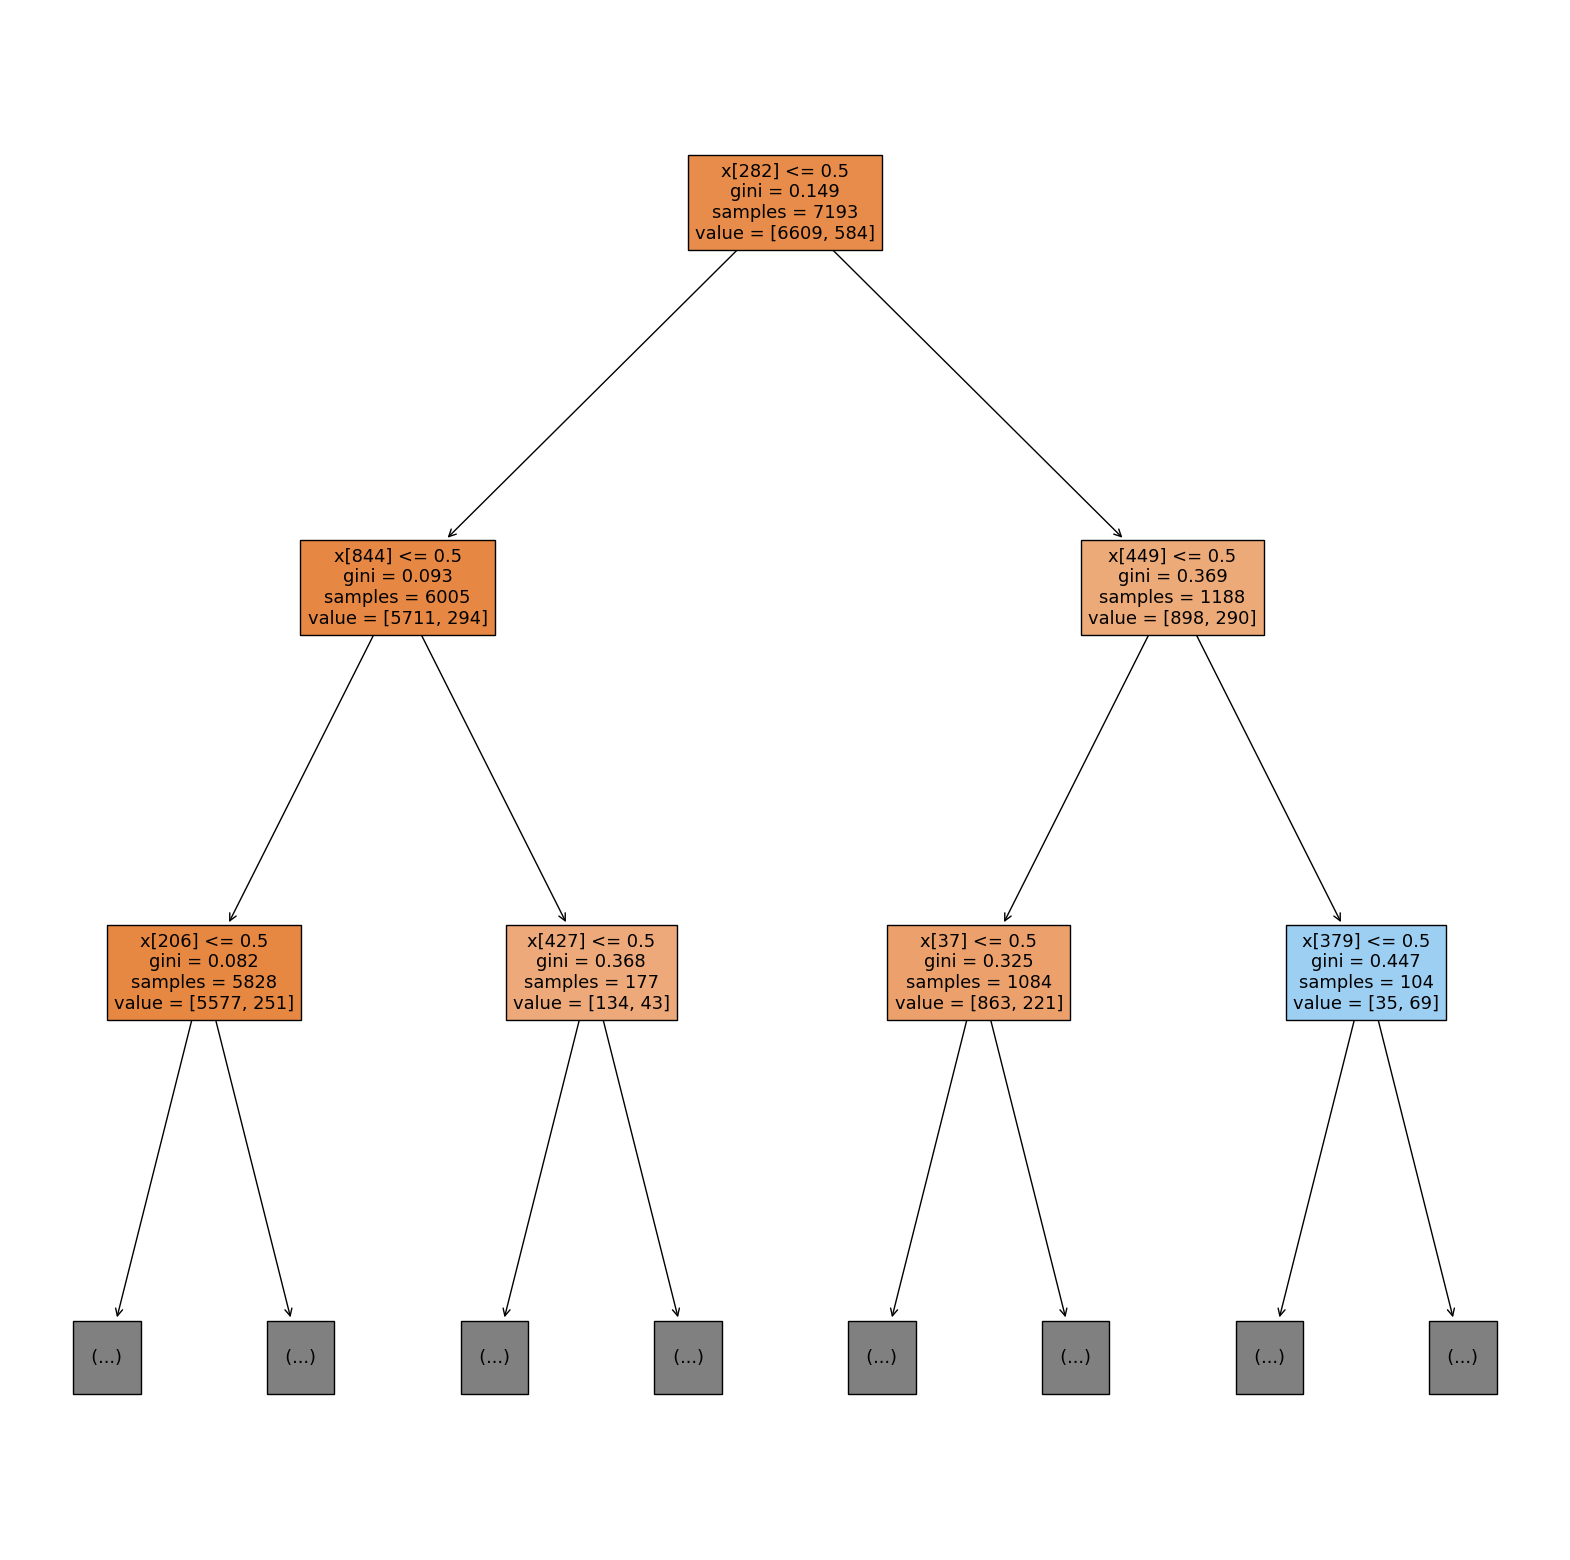

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
tree.plot_tree(my_tree, filled=True, max_depth=2)
plt.show()